In [64]:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Ler base de dados
base_dados = pd.read_excel('data.xlsx')
# verificando a base de dados
base_dados.head()

,Territorialidades,Produto Interno Bruto per capita 2014,Produto Interno Bruto per capita 2015,Produto Interno Bruto per capita 2016
0,Brasil,22.44,21.17,20.19
1,Ceará,11.22,10.59,10.25
2,Abaiara (CE),4.54,4.20,4.23
3,Acarape (CE),5.56,5.26,5.19
4,Acaraú (CE),6.79,6.50,6.25


In [66]:
# Transformando base dados

# Converter de formato largo (wide) para longo (long)
base_dados2 = pd.melt(
    base_dados,
    id_vars=['Territorialidades'],
    var_name='Ano',
    value_name='PIB per capita'
)

# Limpar o nome das colunas de ano (remover texto e deixar só o ano)
base_dados2['Ano'] = base_dados2['Ano'].str.extract(r'(\d{4})')

# Ordenar (opcional)
base_dados2 = base_dados2.sort_values(['Territorialidades', 'Ano'])

base_dados2.reset_index(drop=True, inplace=True)

base_dados2


,Territorialidades,Ano,PIB per capita
0,,2014,
1,,2015,NaN
2,,2016,NaN
3,Abaiara (CE),2014,4.54
4,Abaiara (CE),2015,4.2
...,...,...,...
562,Viçosa do Ceará (CE),2015,4.06
563,Viçosa do Ceará (CE),2016,4.22
564,Várzea Alegre (CE),2014,5.46
565,Várzea Alegre (CE),2015,5.07


In [24]:
# Remover campos nulos
base_dados2 = base_dados2.dropna()
base_dados2

,Territorialidades,Ano,PIB per capita
0,,2014,
3,Abaiara (CE),2014,4.54
4,Abaiara (CE),2015,4.2
5,Abaiara (CE),2016,4.23
6,Acarape (CE),2014,5.56
...,...,...,...
562,Viçosa do Ceará (CE),2015,4.06
563,Viçosa do Ceará (CE),2016,4.22
564,Várzea Alegre (CE),2014,5.46
565,Várzea Alegre (CE),2015,5.07


In [25]:
base_dados2.columns

Index(['Territorialidades', 'Ano', 'PIB per capita'], dtype='object')

In [26]:
# Remover linhas d[com dads=os nulos/brancos
base_dados2 = base_dados2.dropna()


In [27]:
# limpando colunas
# Remover espaços
base_dados2['PIB per capita'] = base_dados2['PIB per capita'].astype(str).str.strip()

# Substituir vírgula por ponto
base_dados2['PIB per capita'] = base_dados2['PIB per capita'].str.replace(',', '.', regex=False)

# Remover strings vazias virando NaN
base_dados2['PIB per capita'] = base_dados2['PIB per capita'].replace('', None)

# Converter para float
base_dados2['PIB per capita'] = base_dados2['PIB per capita'].astype(float)


In [28]:
# agrupar dados
base_dados2.groupby(['Territorialidades', 'Ano']).mean()

PIB per capita
Territorialidades    Ano                 
                     2014             NaN
Abaiara (CE)         2014            4.54
                     2015            4.20
                     2016            4.23
Acarape (CE)         2014            5.56
...                                   ...
Viçosa do Ceará (CE) 2015            4.06
                     2016            4.22
Várzea Alegre (CE)   2014            5.46
                     2015            5.07
                     2016            5.27

[559 rows x 1 columns]

In [29]:
 #Sistema de Grids
# Cor de fundo
cor_fundo= '#f5f5f5'

# Criar o sistema de Grids
grid_graficos = sns.FacetGrid(base_dados2, col='Territorialidades', hue='Territorialidades', col_wrap=4)
# Adicionar grafico linhas em cada grafico
grid_graficos = grid_graficos.map(plt.plot, 'Ano', 'PIB per capita')
# Adicionar uma sombra + Ajuste do título
grid_graficos = grid_graficos.map(plt.fill_between, 'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} Territorialidades')
# Filtrar o título
grid_graficos = grid_graficos.set_titles('{col_name}')
# Adicionar um subtítulo
grid_graficos= grid_graficos.fig.suptitle('Evolução da Renda per capita por cidade do Ceará \n Esse relatório foi elaborado durante o curso "Python para Análise de Dados" \n através da plataforma Udemy', fontsize=18)


# Ajustando o subtítulo
plt.subplots_adjust( top=0.97)
# Salvar arquivo em PDF
plt.savefig("grafico.pdf", bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

In [61]:
 # Calcular variação 2014–2016 por município
# Garantir tipos corretos
base_dados2["Ano"] = base_dados2["Ano"].astype(int)
base_dados2["PIB per capita"] = base_dados2["PIB per capita"].astype(float)

# Filtrar apenas municípios (tirar Brasil e Ceará agregados, se ainda existirem)
base_mun = base_dados2[~base_dados2["Territorialidades"].isin(["Brasil", "Ceará"])].copy()

# Tabela com uma coluna por ano
tabela_anos = base_mun.pivot_table(
    index="Territorialidades",
    columns="Ano",
    values="PIB per capita"
)

tabela_anos = tabela_anos.rename(columns={2014: "PIB_2014", 2015: "PIB_2015", 2016: "PIB_2016"})

# Variação absoluta e percentual 2014–2016
tabela_anos["variacao absoluta"] = tabela_anos["PIB_2016"] - tabela_anos["PIB_2014"]
tabela_anos["variacao percentual"] = (tabela_anos["variacao absoluta"] / tabela_anos["PIB_2014"])
tabela_anos["variacao percentual"] = ((tabela_anos["variacao absoluta"] / tabela_anos["PIB_2014"]) * 100).round(2)


In [62]:
# TOP 10 CIDADES QUE MAIS CRESCERAM
top10_maior_crescimento = tabela_anos.sort_values("variacao absoluta", ascending=False).head(10)
top10_maior_crescimento


Ano,PIB_2014,PIB_2015,PIB_2016,variacao absoluta,variacao percentual
Territorialidades,,,,,
São Gonçalo do Amarante (CE),24.31,28.30,32.70,8.39,34.51
Pereiro (CE),4.88,6.90,8.77,3.89,79.71
Uruburetama (CE),10.04,9.68,11.86,1.82,18.13
Frecheirinha (CE),9.23,10.16,10.70,1.47,15.93
Aquiraz (CE),16.89,16.98,18.15,1.26,7.46
Jijoca de Jericoacoara (CE),7.84,8.26,9.01,1.17,14.92
Solonópole (CE),5.15,5.42,5.98,0.83,16.12
São João do Jaguaribe (CE),7.56,7.68,8.38,0.82,10.85
Itaitinga (CE),9.00,10.78,9.65,0.65,7.22


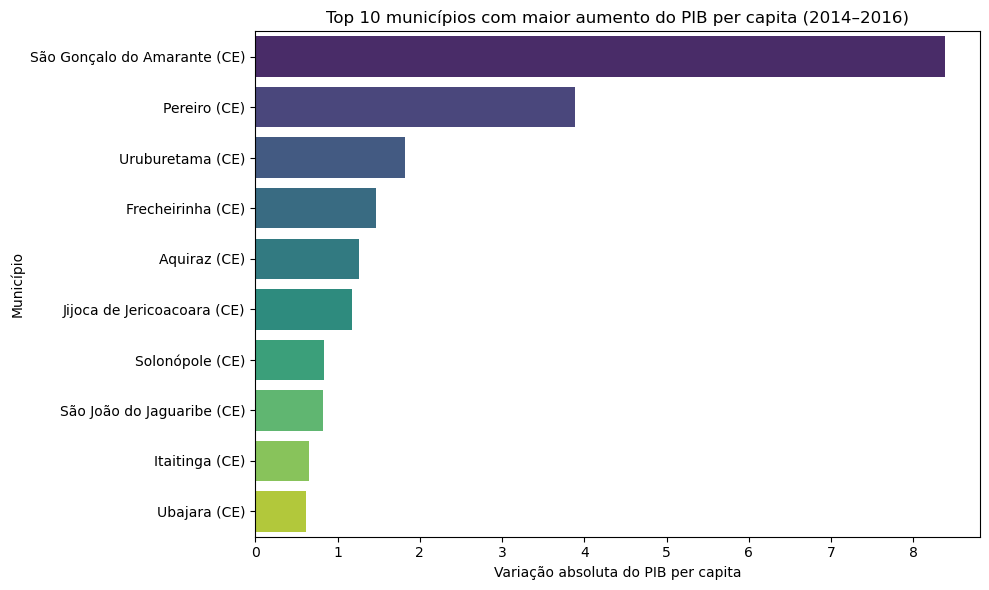

In [49]:
# Ordenando pela variação absoluta e pegar top 10
top10_maior = tabela_anos.sort_values("variacao absoluta", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_maior.reset_index(),
    x="variacao absoluta",
    y="Territorialidades",
    hue="Territorialidades",  
    palette="viridis",        
    legend=False               
)
plt.title("Top 10 municípios com maior aumento do PIB per capita (2014–2016)")
plt.xlabel("Variação absoluta do PIB per capita")
plt.ylabel("Município")
plt.tight_layout()
plt.show()


In [63]:
# TOP 10 CIDADE QUE MENOS CRESCERAM
top10_menor_crescimento = tabela_anos.sort_values("variacao absoluta", ascending=True).head(10)
top10_menor_crescimento


Ano,PIB_2014,PIB_2015,PIB_2016,variacao absoluta,variacao percentual
Territorialidades,,,,,
Quixeré (CE),18.26,12.96,9.89,-8.37,-45.84
Farias Brito (CE),8.20,5.25,4.60,-3.60,-43.90
Horizonte (CE),17.85,14.67,14.89,-2.96,-16.58
Jaguaribara (CE),10.06,9.16,7.15,-2.91,-28.93
Caucaia (CE),12.57,11.71,10.08,-2.49,-19.81
Iguatu (CE),11.32,9.69,9.26,-2.06,-18.20
Pacatuba (CE),9.68,8.44,7.64,-2.04,-21.07
Guaramiranga (CE),12.09,9.81,10.08,-2.01,-16.63
Baturité (CE),7.59,6.77,5.67,-1.92,-25.30


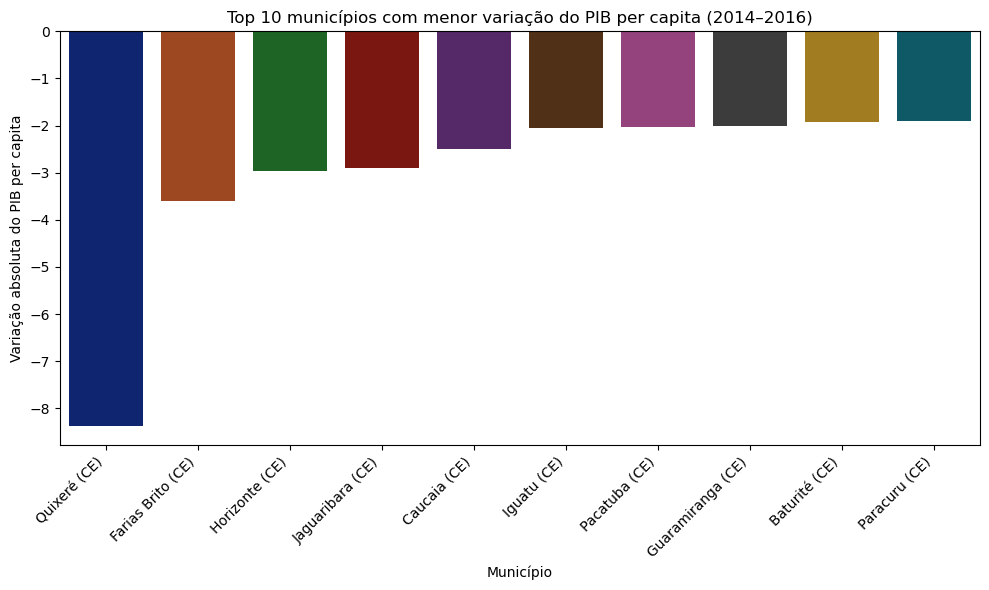

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_menor_crescimento.reset_index(),
    x="Territorialidades",
    y="variacao absoluta",
    hue="Territorialidades",  
    palette="dark",        
    legend=False 
)
plt.title("Top 10 municípios com menor variação do PIB per capita (2014–2016)")
plt.xlabel("Município")
plt.ylabel("Variação absoluta do PIB per capita")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


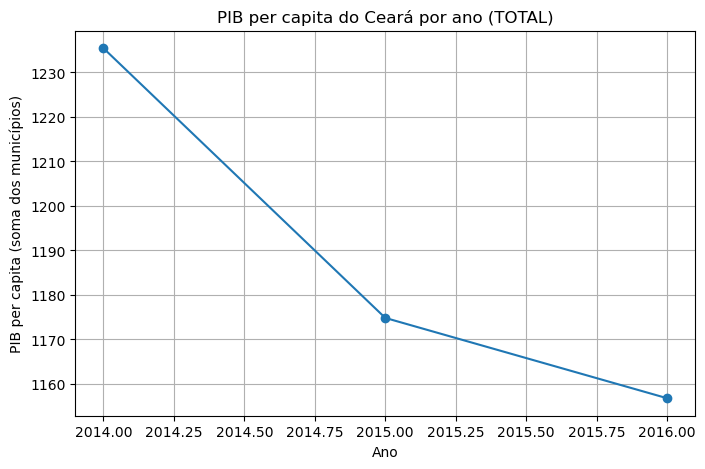

In [59]:
# PIB TOTAL POR ANO
pib_total_ano = base_mun.groupby("Ano")["PIB per capita"].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(pib_total_ano["Ano"], pib_total_ano["PIB per capita"], marker="o")
plt.title("PIB per capita do Ceará por ano (TOTAL)")
plt.xlabel("Ano")
plt.ylabel("PIB per capita (soma dos municípios)")
plt.grid(True)
plt.show()
